In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.dates as mdates
import yfinance as yf
from datetime import date
from sklearn.model_selection import train_test_split
today = date.today()

In [26]:
ticker = 'AAPL'

data = yf.download(ticker, start='2018-01-01', end=str(today))
data = data.reset_index()
new_columns = {col: col[0] for col in data.columns}
data = data.rename(columns=new_columns)
data.columns = [col[0] for col in data.columns]
data['Date'] = data['Date'].dt.tz_localize(None)

# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

[*********************100%***********************]  1 of 1 completed


In [27]:
# Check dataset shape
data.shape

(1846, 6)

In [28]:
# Check dataset head
data.head()

,Date,Close,High,Low,Open,Volume
0,2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600
1,2018-01-03,40.472786,41.017971,40.409341,40.543284,118071600
2,2018-01-04,40.660786,40.764183,40.437543,40.545638,89738400
3,2018-01-05,41.123722,41.210668,40.665487,40.757134,94640000
4,2018-01-08,40.970974,41.267063,40.872274,40.970974,82271200


In [29]:
# Check data types
data.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

In [30]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [31]:
# Check column format
data.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

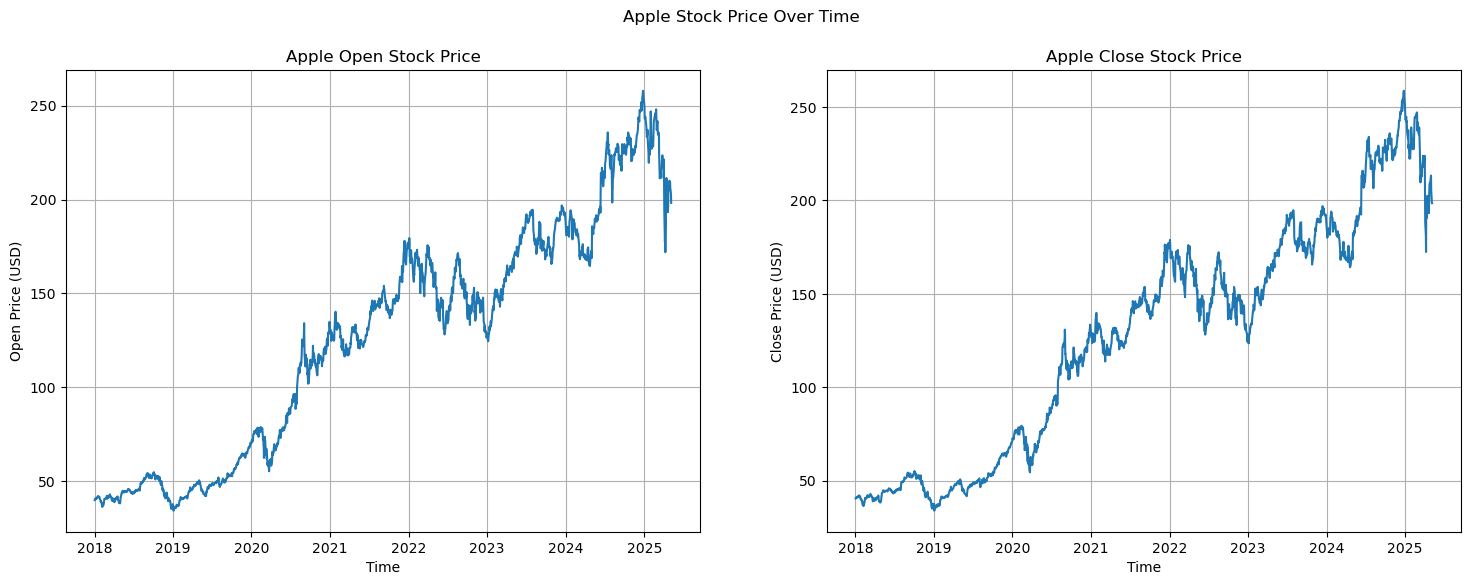

In [32]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Apple Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Apple Close Stock Price")
plt.grid()

plt.suptitle("Apple Stock Price Over Time")
plt.show()

In [33]:
# Select stock price records for the last five years, starting from 2019
data_5years = data[data["Date"].dt.year >= 2019]

# Check filtered data shape
data_5years.shape

(1595, 6)

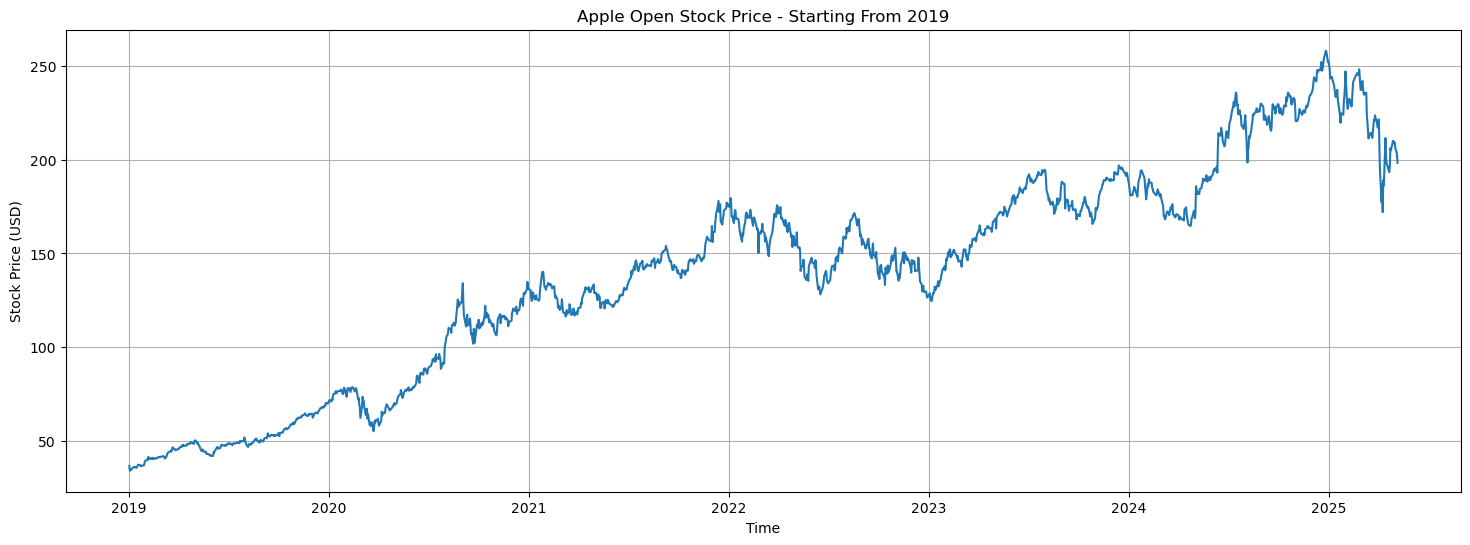

In [34]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Apple Open Stock Price - Starting From 2019")
plt.grid()

Training Set: (1020, 5)
Validation Set: (256, 5)
Testing Set: (319, 5)
Training Dataset:
          Open       High        Low      Close     Volume
251  36.944473  37.889017  36.787049  37.667191  148158800
252  34.342211  34.757238  33.869941  33.915260  365248800
253  34.473398  35.432252  34.299279  35.363079  234428400
254  35.468025  35.499034  34.800166  35.284363  219111200
255  35.673153  36.212212  35.425093  35.956993  164101200
Validation Dataset:
            Open        High         Low       Close    Volume
1271  133.725157  136.433670  132.677342  136.285385  80223600
1272  136.532534  141.672781  136.315061  139.488174  81760300
1273  138.697360  141.514610  138.687480  140.891846  66435100
1274  139.270716  140.793009  137.214620  140.229568  65799300
1275  141.524476  142.592065  140.269069  142.305405  54105100
Testing Dataset:
            Open        High         Low       Close     Volume
1527  190.864052  191.052920  188.448561  190.585724   47145600
1528  189.8004

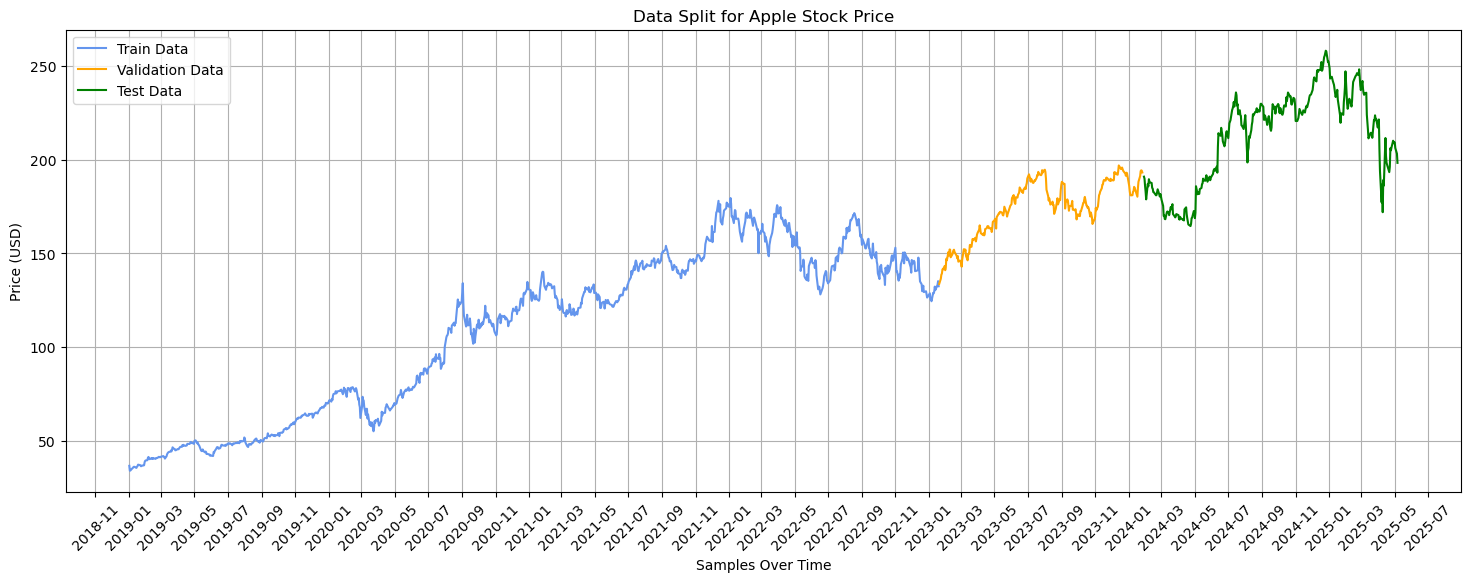

In [35]:
# Set output width
pd.set_option("display.width", 120)

# Load data file
data = data_5years

#### Validate Data Types
# Convert date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Define selected features and target attribute
features = ["Open", "High", "Low",	"Close", "Volume"]
target = "Close"

# Split the initial dataset into training+validation and test
train_val_data, data_test, train_val_dates, data_test_dates = train_test_split(
    data[features], data["Date"], test_size=0.2, shuffle=False
)

# Now split train_val_data into training and validation
data_train, data_validate, data_train_dates, data_validate_dates = train_test_split(
    train_val_data, train_val_dates, test_size=0.20, shuffle=False
)

# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

# Plot stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Apple Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

#### Data Scaling
# Check the distribution of input features
data[features].describe()

# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler to training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

# Prepare scaler model name and location
scaler_model_location = ".//models//"
scaler_model_name = "dataset_scaler"
scaler_model_ext = "gz"

# Store scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name + "." + scaler_model_ext)

# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

# Prepare datasets files and location
data_file_location = ".//data//"
data_file_name_train = "train"
data_file_name_validate = "validate"
data_file_name_test = "test"
data_file_ext = "csv"

# Store datasets
data_train_scaled_final.to_csv(data_file_location + data_file_name_train + "." + data_file_ext, index=None)
data_validate_scaled_final.to_csv(data_file_location + data_file_name_validate + "." + data_file_ext, index=None)
data_test_scaled_final.to_csv(data_file_location + data_file_name_test + "." + data_file_ext, index=None)